In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## OBJECTIVE

### 1. What is the most reason customers churn the ISP
### 2. How to retain old customers to avoid ISP churn
### 3. What promotions can be done to attract customers to subscribe to our ISP?

In [2]:
df = pd.read_csv("../../dataset/internet_service_churn.csv")
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


## Description of columns

Introduction to data¶
The dataset consist of the following features: 1) is_tv_subscriber customer - has a tv subscription ?

2) is_movie_package_subscriber?

3) subscription_age - how many year has the customer use our service

4) bill_avg - last 3 months bill avg

5) reamining_contract - how many year remaining for customer contract. If null; customer didn't have a contract. the customer who has a contract time have to use their service until contract end.if they canceled their service before contract time end they pay a penalty fare.

Two ways in which a customer could be using the services. One through a time-bound contract which costs less and another through a normal monthly subscription which obviously costs more. So, even if a person is not in a contract, he's still a user who's paying monthly fees.

6) service_failure_count customer - call count to call center for service failure for last 3 months

7) download_avg - last 3 months internet usage (GB)

8) upload_avg last - 3 months upload avg (GB)

9) download_over_limit - most of customer has a download limit. if they reach this limit they have to pay for this. this column contain "limit over count" for last 9 months

10) churn - this is the target column. if 1 customer canceled his service

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [4]:
df.shape

(72274, 11)

## cleaning data

In [5]:
df.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [6]:
df.replace(np.nan,'0',inplace=True)

In [7]:
df.isnull().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [8]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.0,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0,0,0.0,0.0,0,1


## Exploratory Data Analysis

C:\Users\chris\AppData\Local\Temp\ipykernel_15368\90348822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'churn',data=df,palette='hls')


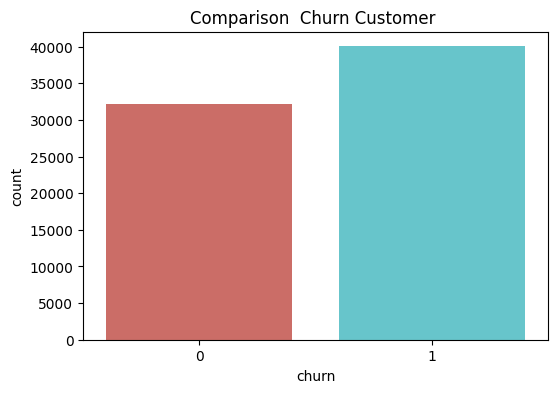

In [9]:
# See the graphic comparison of customer who churn and not churn

plt.figure(figsize=(6,4))
sns.countplot(x = 'churn',data=df,palette='hls')
plt.title('Comparison  Churn Customer ')
plt.show()

From the Plot the churn customer is more than customer who still subscribe 

This is not good condition for the isp company so we must find what the reason make customers want to churn the ISP

In [10]:
df.columns

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

In [11]:
## lets see column is_tv_subscribe and package_subscribe

df_subscribe = df[['is_tv_subscriber','is_movie_package_subscriber']].sum()
df_subscribe

is_tv_subscriber               58922
is_movie_package_subscriber    24185
dtype: int64

In [12]:
df.groupby('is_tv_subscriber')['is_movie_package_subscriber'].value_counts()

is_tv_subscriber  is_movie_package_subscriber
0                 0                              13350
                  1                                  2
1                 0                              34739
                  1                              24183
Name: count, dtype: int64

* Many customers don't subscribe to TV and don't subscribe to movies either
* Also a lot customers subscribe tv but don't subscribe movie
* and there are still quite a lot who subscribe movie and tv 

So from the analyst we know that most the customer have a subscribe to tv or movie or both of them. Now we see with a graphic is the two of the columns have a big impact to churn.
 

In [13]:
tv_count = df.is_tv_subscriber.value_counts()
tv_count

is_tv_subscriber
1    58922
0    13352
Name: count, dtype: int64

C:\Users\chris\AppData\Local\Temp\ipykernel_15368\1098717500.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn', y = df['is_tv_subscriber'].value_counts(),data=df,palette='hls')


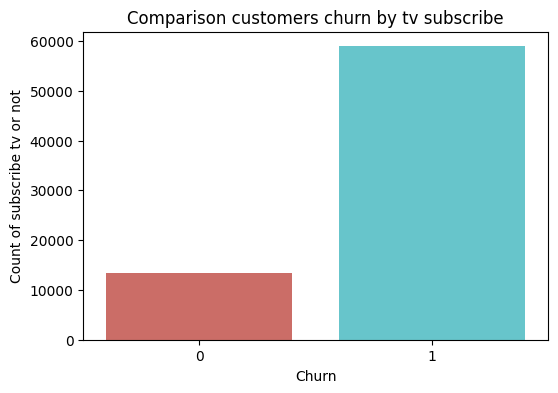

In [14]:
## tv subscribe and churn

plt.figure(figsize=(6,4))
sns.barplot(x='churn', y = df['is_tv_subscriber'].value_counts(),data=df,palette='hls')
plt.xlabel('Churn')
plt.ylabel('Count of subscribe tv or not')
plt.title('Comparison customers churn by tv subscribe')
plt.show()

* From the barplot we know that subscribe tv column is An important feature of churn on an ISP
* because from the graph the imbalance of customers who subscribe to TV then churn is much higher than customers who subscribe to TV but don't churn

C:\Users\chris\AppData\Local\Temp\ipykernel_15368\3825384812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn', y = df['is_movie_package_subscriber'].value_counts(),data=df,palette='hls')


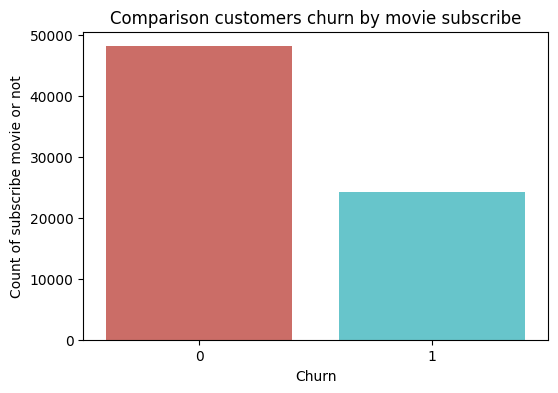

In [15]:
## movie subscribe and churn

plt.figure(figsize=(6,4))
sns.barplot(x='churn', y = df['is_movie_package_subscriber'].value_counts(),data=df,palette='hls')
plt.xlabel('Churn')
plt.ylabel('Count of subscribe movie or not')
plt.title('Comparison customers churn by movie subscribe')
plt.show()

* for the bar plot of movie subscribed customers, there are still more customers who subscribe but don't churn than there are customers who subscribe to movies but churn.

* However, it should be noted that the number of customers who churn is still quite large because almost half of the total customers who do not churn. 

* So it's possible that this feature/column also has an influence on customer churn

In [16]:
df.columns 

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

In [17]:
df.subscription_age

0        11.95
1         8.22
2         8.91
3         6.87
4         6.39
         ...  
72269     0.09
72270     0.06
72271     0.02
72272     0.01
72273     0.01
Name: subscription_age, Length: 72274, dtype: float64

C:\Users\chris\AppData\Local\Temp\ipykernel_15368\45602231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='churn', y ='subscription_age' ,data=df,palette='hls')


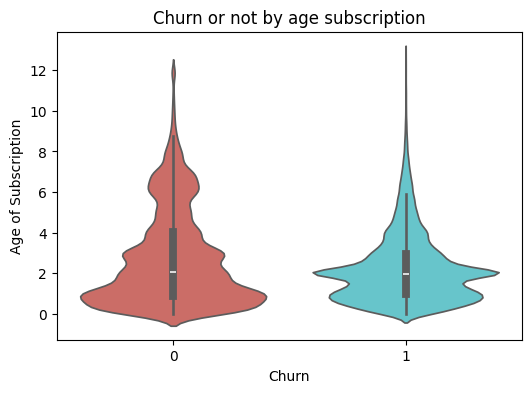

In [19]:
# subscription age analysis
## movie subscribe and churn

plt.figure(figsize=(6,4))
sns.violinplot(x='churn', y ='subscription_age' ,data=df,palette='hls')
plt.xlabel('Churn')
plt.ylabel('Age of Subscription')
plt.title('Churn or not by age subscription')
plt.show()

From the Violin plot, it can be seen that customers who churn are customers who have subscribed for around 1 to 3 years

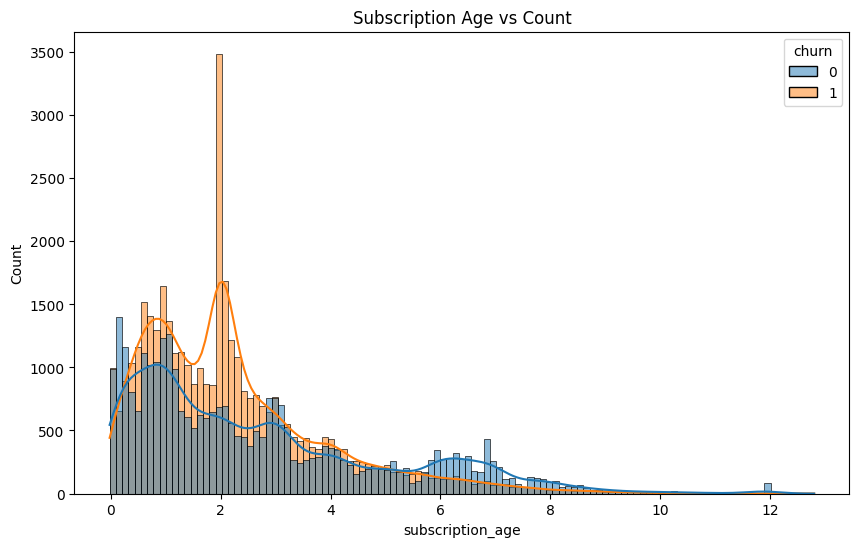

In [21]:
plt.figure(figsize = (10,6))
sns.histplot(data = df, x= 'subscription_age', kde = True, hue = 'churn')
plt.title('Subscription Age vs Count')
plt.show()

* With the histogram diagram, it can be clearly seen that customers with the highest churn are in the second year they subscribe
* However, it can also be seen that the distribution between customers who churn and not in the first to third years is quite even. And for customers who have exceeded their third year of subscription, there is rarely or even no churn

#### Lets filter the customer who churn by age subscription an analyzed it more detail

In [23]:
df_agesubs = df.loc[df['churn']==1]
df_agesubs.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
1,18,0,0,8.22,0,0,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.0,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0,0,0.0,0.0,0,1
6,71,0,0,8.96,18,0.0,0,21.3,2.0,0,1


In [24]:
df_agesubs.subscription_age.value_counts()

subscription_age
 1.98     1047
 1.97      655
 1.99      379
 0.01      337
 2.01      317
          ... 
 9.24        1
 7.72        1
 10.85       1
 10.72       1
-0.02        1
Name: count, Length: 998, dtype: int64